In [277]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\massn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\massn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\massn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [278]:
api_key = "1ddaa9d5feb3480287f68228077bee1d"
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [279]:
btc_headlines = newsapi.get_everything(
    q="Venezuela",
   
    
)

(btc_headlines["totalResults"])

5570

In [283]:
bitcoin_sentiments = []

for article in btc_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        bitcoin_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(bitcoin_sentiments)


cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.8689,0.282,0.718,0.000,image copyrightGetty Images\r\nimage captionFr...
1,-0.7003,0.218,0.718,0.064,image captionSecurity forces have been deploye...
2,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nYULIMAR ROJAS OF VENEZUELA...
3,0.2732,0.000,0.935,0.065,"OSLO, July 29 (Reuters) - Norway's Equinor (EQ..."
4,0.1280,0.000,0.949,0.051,"GENEVA, July 8 (Reuters) - Venezuela has paid ..."


In [280]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [286]:
def wordcloud(text, title = ""):
    df_cloud=WordCloud(width=500, colormap="RdYlBu", stopwords = ['the', 'to', 'char', 'chars', 'photo', 'july', 'image', 'sharing', 'Reuters', 'of', 'on', 'and', 'for', 'ourselves', 'hers', 
                                                                  'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 
                                                                  'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off',
                                                                  'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 
                                                                  'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 
                                                                  'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any',
                                                                  'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 
                                                                  'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 
                                                                  'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 
                                                                  'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 
                                                                  'further', 'was', 'here', 'than'

                                                                  
                                                                 ]).generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict={"fontsize":48, "fontweight":"bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

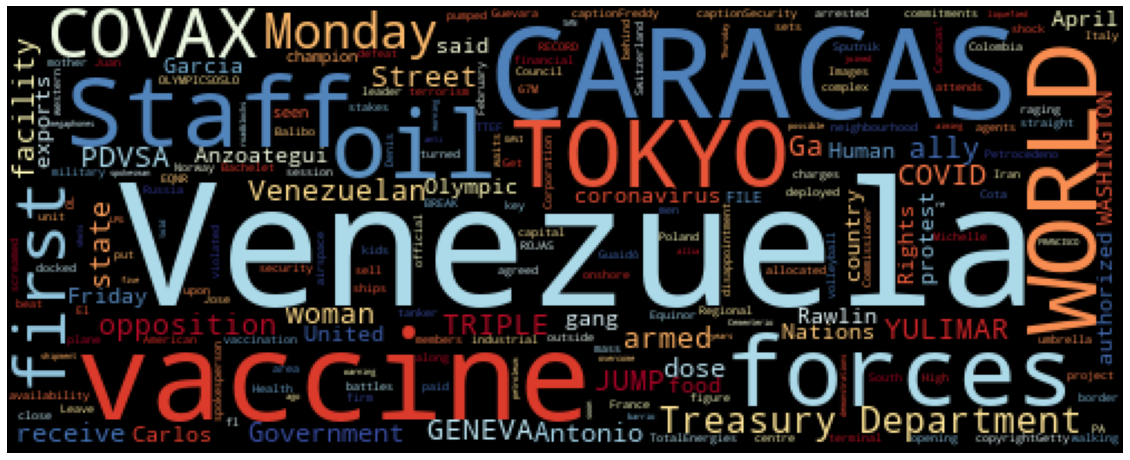

In [287]:
wordcloud(btc_df.Text.str.cat())
